In [1]:
import sys
sys.path.append('./code')
from importlib import reload

In [2]:
from config import row_colors, columns_to_names, row_colors_dict

2


In [3]:
import make_figure4
from make_figure4 import *
import pickle

from config import load_pileup_variables

(goodinds, merged_clustdict, merged_inds_to_subset, 
    cooldict_50kb, ind_to_gene, all_ind_to_region, my_treg_comp) = load_pileup_variables()

In [4]:
%load_ext autoreload
%autoreload
import scanpy as sc

sc.settings.set_figure_params(dpi=80, color_map='coolwarm', frameon=True)
plt.rcParams.update({'font.size': 12})
plt.rcParams.update({"axes.grid.axis" : 'both'})
plt.rcParams.update({"axes.grid" : True})

plt.rcParams.update({
    'axes.labelsize': 14,       # x and y labels' font size
    'xtick.labelsize': 8,      # x tick labels' font size
    'ytick.labelsize': 8,      # y tick labels' font size
    'axes.titlesize': 14,        # Axes title font size
    'patch.linewidth' : .35,
    'lines.linewidth' : .5,
    'legend.fontsize': 6,      # Legend font size
})
plt.rcParams['pdf.fonttype'] = 42

plt.rcParams.update({
    'axes.labelsize': 8,       # x and y labels' font size
    'xtick.labelsize': 6,      # x tick labels' font size
    'ytick.labelsize': 6,      # y tick labels' font size
    'axes.titlesize': 10,        # Axes title font size
    'patch.linewidth' : .35,
    'lines.linewidth' : .5,
    'xtick.major.pad' : 2,
    'ytick.major.pad' : 2,

})
plt.rcParams['axes.linewidth'] = .25
plt.rcParams['xtick.major.width'] = .25
plt.rcParams['ytick.major.width'] = .25
plt.rcParams['ytick.major.size'] = 2
plt.rcParams['xtick.major.size'] = 2
plt.rcParams['grid.linewidth'] = .25

plt.rcParams['axes.facecolor'] = 'none' # Or any suitable colour...
plt.rcParams['figure.facecolor'] = 'none'
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['savefig.facecolor'] = 'none'

In [5]:
from initialize import *
import cooler 

treg_250kb = cooler.Cooler('./Treg_all.mcool::/resolutions/250000')
treg_50kb = cooler.Cooler('./Treg_all.mcool::/resolutions/50000')


(chromsizes, parsed_chroms, region_to_inds, 
    all_region_to_ind, inds_to_region, all_ind_to_region, 
    chrom_to_start, chrom_to_end) = initialize_helper_vars(treg_250kb)

In [6]:
gene_to_ind = pickle.load(open('gene_to_ind.p', 'rb'))


In [7]:
_250kb_hub_annotations = pd.read_csv('./annotations/_250kb_hub_annotations.tsv', sep = '\t', index_col=0)

In [11]:
%autoreload 2
from hub_pileup import *
from compute_differential_hic_hub import *
from collections import defaultdict
from make_figure4 import *
import itertools
import cooler
from collections import defaultdict
from make_figure4 import *
from hub_pileup import *
import itertools

our_treg_25kb = cooler.Cooler('./Treg_all.mcool::/resolutions/25000')
our_tcon_25kb = cooler.Cooler('./Tconv_all.mcool::/resolutions/25000')


df = pd.DataFrame([goodinds, merged_clustdict['all']]).T
df = df[df[1].isin(merged_inds_to_subset)]
df.columns = ['ind', 'cluster']
df['chrom'] = [all_ind_to_region[x][0] for x in df['ind'].values]
df['chrom'] = df['chrom']



megaloop_pileup_cooldict = {
    'Our_Treg' : our_treg_25kb,
    'Our_Tcon' : our_tcon_25kb,
}


padding_size = 50

inter_all_mat_dict, inter_all_metadata = pileup_bins_with_hub(df, megaloop_pileup_cooldict, 
                                                              {x : y for x, y in chrom_to_start.items()}, 
                                                              None, 
                                                              None, 
                                                              padding_size=padding_size, 
                                                              fetch_oe=True,
                                                              resolution_out = 25_000,
                                                              skip_metadomains = True)

#### Hub to hub

Our_Treg


/Genomics/pritykinlab/gabe/jupys/tregs/./code/hub_pileup.py:401: UserWarning: FixedFormatter should only be used together with FixedLocator
  a.set_yticklabels([-cutoff, "Anchor1", cutoff])
/Genomics/pritykinlab/gabe/jupys/tregs/./code/hub_pileup.py:439: UserWarning: FixedFormatter should only be used together with FixedLocator
  a.set_yticklabels([-cutoff, "Anchor1", cutoff])


Our_Tcon


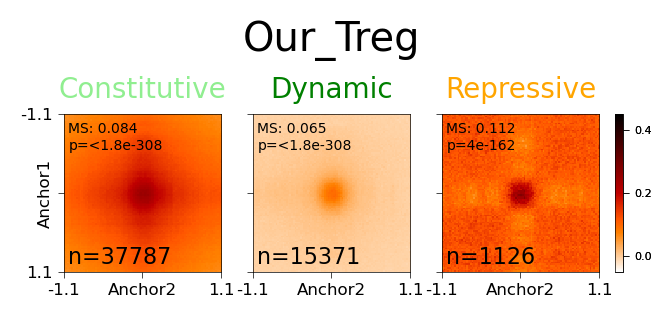

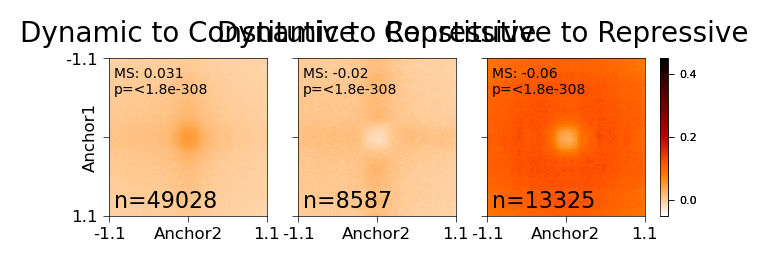

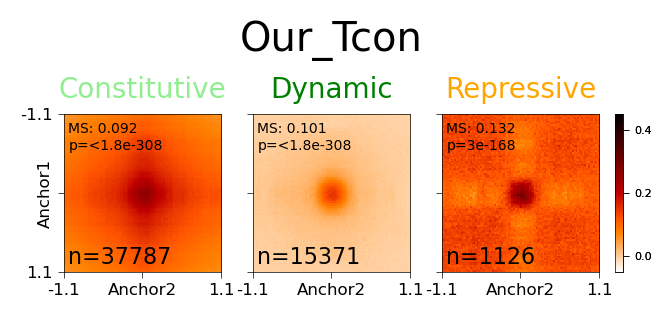

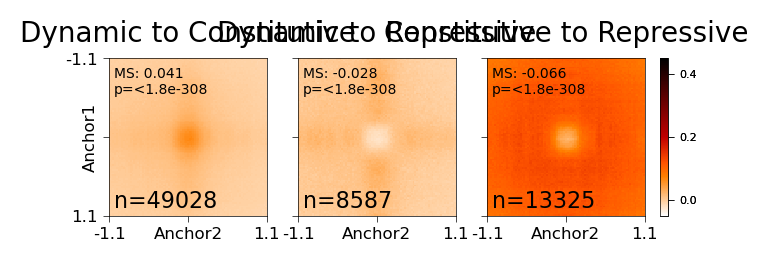

In [12]:
newline = '\n'
all_results_dicts = {}
for key in inter_all_mat_dict:
    print(key)
    (fig_within_cluster, fig_between_cluster), results = plot_cluster_pileups_from_result(key, inter_all_mat_dict, inter_all_metadata,
                                     inter_all_metadata['cluster1'].unique(),
                                     res = 25_000,
                                     vmax = .45,
                                     vmin = -.05,
                                     columns_to_names = columns_to_names,
                                     row_colors_dict = row_colors_dict,
                                     s1 = 4,
                                     center = 5,
                                     center_method='center_square',
                                    )
    fig_within_cluster.suptitle(f"{key}", y=4, x=1.7, ha='center')
    all_results_dicts[key] = results
    fig_within_cluster.savefig(f'./plots/paper/fig4/within_hubs_{key}.pdf', bbox_inches='tight')
    fig_between_cluster.savefig(f'./plots/paper/fig4/between_hubs_{key}.pdf', bbox_inches='tight')